<a href="https://colab.research.google.com/github/jingstat/Customer-Churn-Prediction-for-Digital-Music-Service-with-PySpark/blob/main/ALEX_issue17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extend the concentrated liquity  
Invariance function for Balencor $\eqref{eq:inv_fun}$


\begin{equation}
 B_x^{w_x} B_y^{w_y} = L 
\label{eq:inv_fun} \tag{1} 
\end{equation}


Define $A_i$ and $A_o$ as the amount of tokens i and o exchanged, when a user sends token i to get tokens o.  

Out-Given-in: 

$$ A_o = B_o (1- (\frac{B_i}{B_i+A_i}))^\frac{w_i}{w_o}$$

In-Given-Out: 

$$A_i = B_i((\frac{B_o}{B_o - A_o})^\frac{w_o}{w_i} -1) $$

Spotprice:
$$SP_{i}^o = \frac{B_{i} \cdot w_o}{B_o \cdot w_{i}}$$

In-Given-Price: 

$$A_i = B_i((\frac{sp_i^{o'}}{sp_i^o})^{w_o} - 1) $$

Liquidity fingerprint: 

follow Uni v3 $ L =  \frac{\partial y}{\partial \sqrt{P}}$ and let price tick $t_i = log(P)$ 
\begin{equation}
L(t_i) = 2Lw_x^{w_y}w_y^{w_x}exp( (w_x- \frac{1}{2})t_i)
\end{equation}

Concentrated liquilidy 


$$ (x + x_{offset})^{w_x} (y+y_{offset})^{w_y} = L $$ 

$$ L =  \frac{\partial y}{\partial P^{w_x}} (\frac{w_x}{w_y})^{w_x} $$  

$$ L =  \frac{\partial x}{\partial P^{-w_y}} (\frac{w_y}{w_x})^{w_y} $$ 


For a price range $[p_a, p_b]$  (price is price of x interms of y)   For price tick $t_i = log(P)$ 

$$ y_{offset} = L \cdot exp(w_x t_i) (\frac{w_x}{w_y})^{-w_x} $$ 

$$ x_{offset} = L \cdot exp(-w_y t_i) (\frac{w_y}{w_x})^{-w_y} $$ 


## special case for callateral / ayToken pool 

$$SpotPrice_{ay}^c = \frac{B_{ay} \cdot w_c}{B_c \cdot w_{ay}}$$

If $w_c < w_ay$, aritrager only has incentive to reblance (add more ayToken and take out Callateral) if the spotprice is less than the market price.  How is that guranteeded?   



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


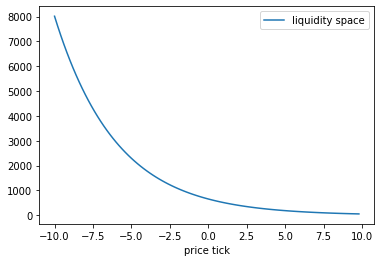

In [1]:
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import random
import pandas as pd 

#Liquity fingerprint 
w_x=0.25
w_y= 1-w_x
t =  np.array(list(range(-50,50)))/5
t
p = np.exp(t)
p
L = 1000

lt = L*2*w_x**w_y*w_y**w_x*np.exp((w_x - 0.5)*t)

fig, ax = plt.subplots()
sns.lineplot(t,lt, label="liquidity space",)
ax.set_xlabel('price tick')
plt.show()

#x_offset = L*np.exp(-w_y*np.log(p))*(w_y/w_x)**(-w_y)
# fig, ax = plt.subplots()
# sns.lineplot(t,x_offset,color="blue", label="x-reserve")
# y_offset = L*np.exp(w_x*np.log(p))*(w_x/w_y)**(-w_x)
# sns.lineplot(t,y_offset,color="orange", label="y-reserve",)
# ax.set_xlabel('price tick')
# plt.show()

260.84743001221455
260.84743001221455


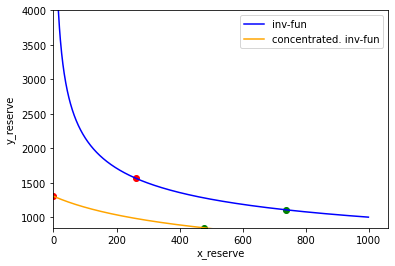

In [2]:
x = np.array(list(range(1,1000)))
w_x = 0.25 
w_y = 1-w_x 

L = 1000
y = (L/(x**w_x))**(1/w_y)

# suppose set price range [pa, pb] = [0.5, 2], then ti = -/+ 0.69

x_offset = L*np.exp(-w_y*np.log(2))*(w_y/w_x)**(-w_y)


y_offset = L*np.exp(w_y*np.log(1/2))*(w_y/w_x)**(-w_y)
print(x_offset)
print(y_offset)

x_tilta = x - x_offset
y_tilta = (L/x**w_x)**(1/w_y) - y_offset 

df = pd.DataFrame({'x_reserve':x, 'y_reserve':y, 'x_offset': x_tilta, 'y_offset': y_tilta})
xa = 1000/(1.5**0.75)
ya = xa*1.5
xb = 1000/(6**0.75)
yb = xb*6

fig, ax = plt.subplots()
sns.lineplot(data=df, x='x_reserve', y='y_reserve', color = 'blue', label= 'inv-fun')
sns.lineplot(data=df, x='x_offset', y='y_offset', color= 'orange', label= 'concentrated. inv-fun')
plt.scatter(x=xb, y=yb, color='r', label = 'Pb')
plt.scatter(x=xa, y=ya, color='g', label = 'Pa')

plt.scatter(x=xa-x_offset, y=ya-y_offset, color='g', label = 'Pa')
plt.scatter(x=xb-x_offset, y=yb-y_offset, color='r', label = 'Pa')

ax.set_xlim(0,)
ax.set_ylim(ya-y_offset,4000)
plt.show()